### Reinforcement_learning_in_clinical_medicine

In [2]:
install.packages('DynTxRegime')
library(DynTxRegime)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘modelObj’, ‘kernlab’, ‘rgenoud’, ‘dfoptim’


Loading required package: modelObj



### Prepare the data

In [3]:
url='https://raw.githubusercontent.com/wujinja-cgu/Reinforcement_learning_in_clinical_medicine/main/mydata_RL.csv'
mydata_RL=read.csv(url)
head(mydata_RL)

,X,icustayid,gender,age,Weight,Stage2_GCS,Stage2_HR,Stage2_SysBP,Stage2_MeanBP,Stage2_DiaBP,⋯,Stage1_median_dose_vaso,Stage1_max_dose_vaso,Stage1_input_total,Stage1_input_4hourly,Stage1_output_total,Stage1_output_4hourly,Stage1_cumulated_balance,Stage1_SOFA,Stage1_SIRS,Stage1_mortality_90d
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<int>
1,1,200003,0,17639.83,78.7,15.00000,68.33333,103.8333,70.33333,55.33333,⋯,0,0,6527.00,50,13617,520,-7090.000,3,1,1
2,2,200011,1,30766.07,101.4,15.00000,74.60000,135.4000,70.60000,38.20000,⋯,0,0,0.00,0,0,0,0.000,10,0,0
3,3,200012,1,12049.22,51.2,15.00000,103.50000,99.5000,78.00000,72.50000,⋯,0,0,0.00,0,0,0,0.000,7,3,0
4,4,200014,0,30946.97,87.7,7.00000,68.50000,119.2500,77.62500,61.25000,⋯,0,0,1300.00,1300,340,160,960.000,5,2,1
5,5,200030,0,19793.59,89.1,12.83333,112.50000,142.6667,97.16667,75.83333,⋯,0,0,9552.00,50,6830,540,2722.000,4,3,0
6,6,200033,0,24524.75,73.0,15.00000,71.80000,127.8571,92.80000,72.57143,⋯,0,0,10661.05,725,5746,360,4915.048,2,0,1


In [5]:
str(mydata_RL)

'data.frame':	16316 obs. of  102 variables:
 $ X                       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ icustayid               : int  200003 200011 200012 200014 200030 200033 200038 200047 200063 200065 ...
 $ gender                  : int  0 1 1 0 0 0 0 0 0 1 ...
 $ age                     : num  17640 30766 12049 30947 19794 ...
 $ Weight                  : num  78.7 101.4 51.2 87.7 89.1 ...
 $ Stage2_GCS              : num  15 15 15 7 12.8 ...
 $ Stage2_HR               : num  68.3 74.6 103.5 68.5 112.5 ...
 $ Stage2_SysBP            : num  103.8 135.4 99.5 119.2 142.7 ...
 $ Stage2_MeanBP           : num  70.3 70.6 78 77.6 97.2 ...
 $ Stage2_DiaBP            : num  55.3 38.2 72.5 61.2 75.8 ...
 $ Stage2_RR               : num  22.33 18.8 18 9.88 25.17 ...
 $ Stage2_SpO2             : num  98.3 99 96 98.4 95.5 ...
 $ Stage2_Temp_C           : num  37.8 37.4 36.7 36 36.7 ...
 $ Stage2_FiO2             : num  0.4 0.3 0.21 0.4 0.36 ...
 $ Stage2_Potassium        : num  3.75 5.1 3.5

In [6]:
mydata_RL$A2=ifelse(mydata_RL$Stage2_input_4hourly>=median(mydata_RL$Stage2_input_4hourly),1,0)
mydata_RL$A2

[1] 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0
   [37] 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 1 1 1 0
   [73] 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0
  [109] 1 1 1 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0
  [145] 1 1 0 1 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1
  [181] 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1
  [217] 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 0 1 1
  [253] 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1
  [289] 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1 0
  [325] 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 0 0 1 0 1 0 1
  [361] 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0
  [397] 0 0 1 0 0 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0
  [433] 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1
  [469] 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0
  [505] 0 0 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0 1 1
  [541] 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0
  [577] 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0
  [613] 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 0 1 0 0 0 0 1
  [649] 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0
  [685] 1 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0 1 1 1 1 0 0 0 1 0 1 1 0 0
  [721] 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 1 1 1 1
  [757] 1 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1
  [793] 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0
  [829] 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1
  [865] 0 1 0 0 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0
  [901] 1 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 0 0
  [937] 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 0 0
  [973] 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0
 [1009] 1 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1
 [1045] 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 0
 [1081] 1 0 1 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1
 [1117] 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 1
 [1153] 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1
 [1189] 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 0 0 1 1 0 1
 [1225] 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0
 [1261] 0 1 0 0 1 0 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1
 [1297] 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1 0 1
 [1333] 1 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 0
 [1369] 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0
 [1405] 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1
 [1441] 0 1 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0
 [1477] 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 0 1
 [1513] 0 1 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1
 [1549] 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1
 [1585] 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1
 [1621] 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 1
 [1657] 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1
 [1693] 1 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0
 [1729] 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 1 0 1 0 0 0 1
 [1765] 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0 1 0 0 1 1
 [18

In [7]:
moMain <- buildModelObj(model = ~ Stage1_GCS+
                      Stage1_HR+
                      Stage1_SysBP+
                      Stage1_MeanBP+
                      Stage1_DiaBP+
                      Stage1_RR+
                      Stage1_SpO2+
                      Stage1_Temp_C+
                      Stage1_FiO2+
                      Stage1_Potassium+
                      Stage1_Sodium+
                      Stage1_Chloride+
                      Stage1_Glucose+
                      Stage1_BUN+
                      Stage1_Creatinine+
                      Stage1_Magnesium+
                      Stage1_Calcium+
                      Stage1_Ionised_Ca+
                      Stage1_CO2_mEqL+
                      Stage1_SGOT+
                      Stage1_SGPT+
                      Stage1_Total_bili+
                      Stage1_Albumin+
                      Stage1_Hb+
                      Stage1_WBC_count+
                      Stage1_Platelets_count+
                      Stage1_PTT+
                      Stage1_PT+
                      Stage1_INR+
                      Stage1_Arterial_pH+
                      Stage1_paO2+
                      Stage1_paCO2+
                      Stage1_Arterial_BE+
                      Stage1_HCO3+
                      Stage1_Arterial_lactate+
                      Stage1_mechvent+
                      Stage1_Shock_Index+
                      Stage1_PaO2_FiO2+
                      Stage2_GCS+
                      Stage2_HR+
                      Stage2_SysBP+
                      Stage2_MeanBP+
                      Stage2_DiaBP+
                      Stage2_RR+
                      Stage2_SpO2+
                      Stage2_Temp_C+
                      Stage2_FiO2+
                      Stage2_Potassium+
                      Stage2_Sodium+
                      Stage2_Chloride+
                      Stage2_Glucose+
                      Stage2_BUN+
                      Stage2_Creatinine+
                      Stage2_Magnesium+
                      Stage2_Calcium+
                      Stage2_Ionised_Ca+
                      Stage2_CO2_mEqL+
                      Stage2_SGOT+
                      Stage2_SGPT+
                      Stage2_Total_bili+
                      Stage2_Albumin+
                      Stage2_Hb+
                      Stage2_WBC_count+
                      Stage2_Platelets_count+
                      Stage2_PTT+
                      Stage2_PT+
                      Stage2_INR+
                      Stage2_Arterial_pH+
                      Stage2_paO2+
                      Stage2_paCO2+
                      Stage2_Arterial_BE+
                      Stage2_HCO3+
                      Stage2_Arterial_lactate+
                      Stage2_mechvent+
                      Stage2_Shock_Index+
                      Stage2_PaO2_FiO2,
                      solver.method = 'glm',
                      solver.args = list('family'='binomial'),
                      predict.method = 'predict.glm',
                      predict.args = list(type='response'))

In [8]:
moCont <- buildModelObj(model = ~ Stage2_GCS+
                      Stage2_HR+
                      Stage2_SysBP+
                      Stage2_MeanBP+
                      Stage2_DiaBP+
                      Stage2_RR+
                      Stage2_SpO2+
                      Stage2_Temp_C+
                      Stage2_FiO2+
                      Stage2_Potassium+
                      Stage2_Sodium+
                      Stage2_Chloride+
                      Stage2_Glucose+
                      Stage2_BUN+
                      Stage2_Creatinine+
                      Stage2_Magnesium+
                      Stage2_Calcium+
                      Stage2_Ionised_Ca+
                      Stage2_CO2_mEqL+
                      Stage2_SGOT+
                      Stage2_SGPT+
                      Stage2_Total_bili+
                      Stage2_Albumin+
                      Stage2_Hb+
                      Stage2_WBC_count+
                      Stage2_Platelets_count+
                      Stage2_PTT+
                      Stage2_PT+
                      Stage2_INR+
                      Stage2_Arterial_pH+
                      Stage2_paO2+
                      Stage2_paCO2+
                      Stage2_Arterial_BE+
                      Stage2_HCO3+
                      Stage2_Arterial_lactate+
                      Stage2_mechvent+
                      Stage2_Shock_Index+
                      Stage2_PaO2_FiO2,
                      solver.method = 'glm',
                      solver.args = list('family'='binomial'),
                      predict.method = 'predict.glm',
                      predict.args = list(type='response'))

In [9]:
y=mydata_RL[,'Stage2_mortality_90d']
y

[1] 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1
   [37] 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   [73] 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0
  [109] 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
  [145] 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0
  [181] 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0
  [217] 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0
  [253] 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
  [289] 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
  [325] 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1
  [361] 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
  [397] 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0
  [433] 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
  [469] 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1
  [505] 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0
  [541] 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
  [577] 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0
  [613] 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0
  [649] 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
  [685] 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0
  [721] 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
  [757] 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0
  [793] 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
  [829] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1
  [865] 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
  [901] 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0
  [937] 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1
  [973] 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 [1009] 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 [1045] 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0
 [1081] 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1
 [1117] 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1
 [1153] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0
 [1189] 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0
 [1225] 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 [1261] 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0
 [1297] 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1
 [1333] 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 [1369] 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0
 [1405] 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 [1441] 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 [1477] 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1
 [1513] 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0
 [1549] 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1585] 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 [1621] 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 [1657] 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0
 [1693] 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 [1729] 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0
 [1765] 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 [18

In [10]:
mydata_RL$A2=as.factor(mydata_RL$A2)

In [11]:
fitSS <- qLearn(moMain = moMain,
                moCont = moCont,
                data = mydata_RL,
                response = y,
                txName = "A2")

First step of the Q-Learning Algorithm.

Outcome regression.
Combined outcome regression model: ~ Stage1_GCS+Stage1_HR+Stage1_SysBP+Stage1_MeanBP+Stage1_DiaBP+Stage1_RR+Stage1_SpO2+Stage1_Temp_C+Stage1_FiO2+Stage1_Potassium+Stage1_Sodium+Stage1_Chloride+Stage1_Glucose+Stage1_BUN+Stage1_Creatinine+Stage1_Magnesium+Stage1_Calcium+Stage1_Ionised_Ca+Stage1_CO2_mEqL+Stage1_SGOT+Stage1_SGPT+Stage1_Total_bili+Stage1_Albumin+Stage1_Hb+Stage1_WBC_count+Stage1_Platelets_count+Stage1_PTT+Stage1_PT+Stage1_INR+Stage1_Arterial_pH+Stage1_paO2+Stage1_paCO2+Stage1_Arterial_BE+Stage1_HCO3+Stage1_Arterial_lactate+Stage1_mechvent+Stage1_Shock_Index+Stage1_PaO2_FiO2+Stage2_GCS+Stage2_HR+Stage2_SysBP+Stage2_MeanBP+Stage2_DiaBP+Stage2_RR+Stage2_SpO2+Stage2_Temp_C+Stage2_FiO2+Stage2_Potassium+Stage2_Sodium+Stage2_Chloride+Stage2_Glucose+Stage2_BUN+Stage2_Creatinine+Stage2_Magnesium+Stage2_Calcium+Stage2_Ionised_Ca+Stage2_CO2_mEqL+Stage2_SGOT+Stage2_SGPT+Stage2_Total_bili+Stage2_Albumin+Stage2_Hb+Stage2_WBC_co

In [12]:
A2Qlearn <- optTx(fitSS)$optimalTx

In [13]:
DTRstep(fitSS)

Q-Learning: step 1 


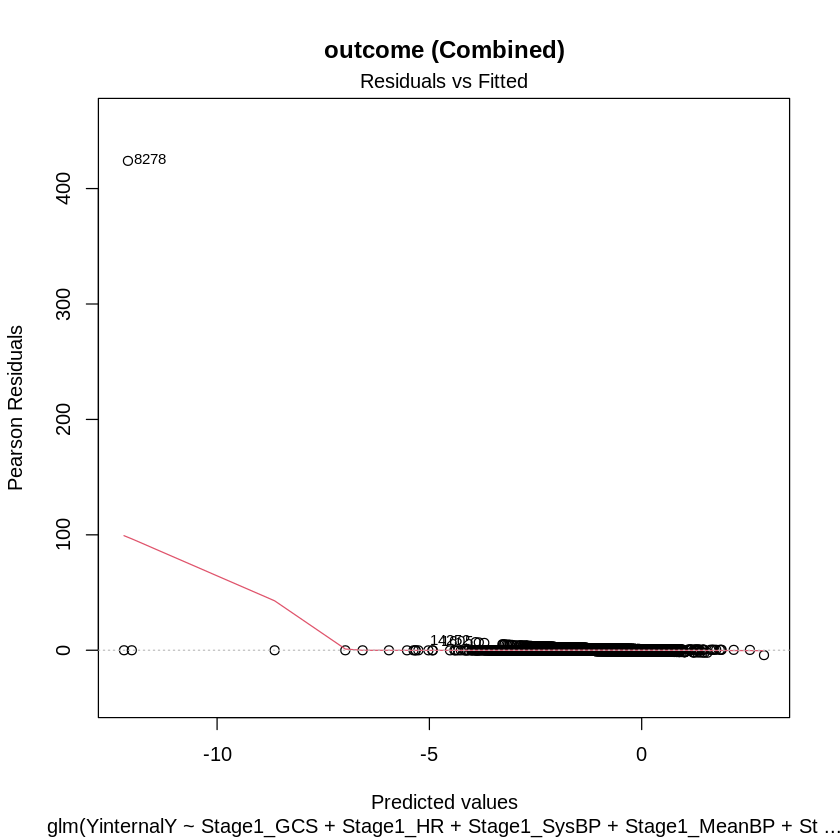

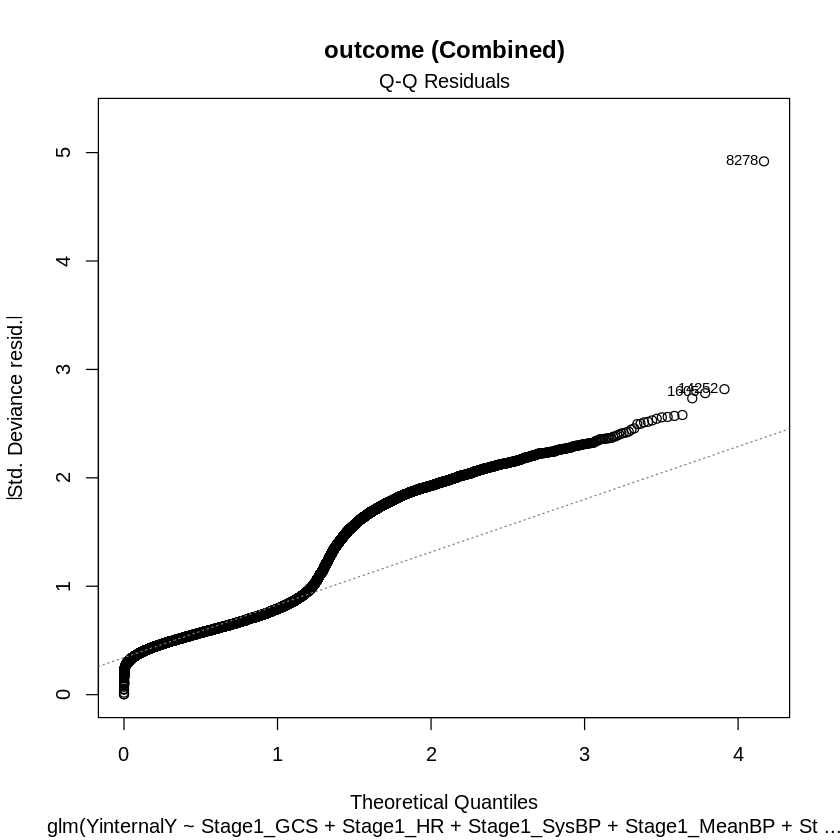

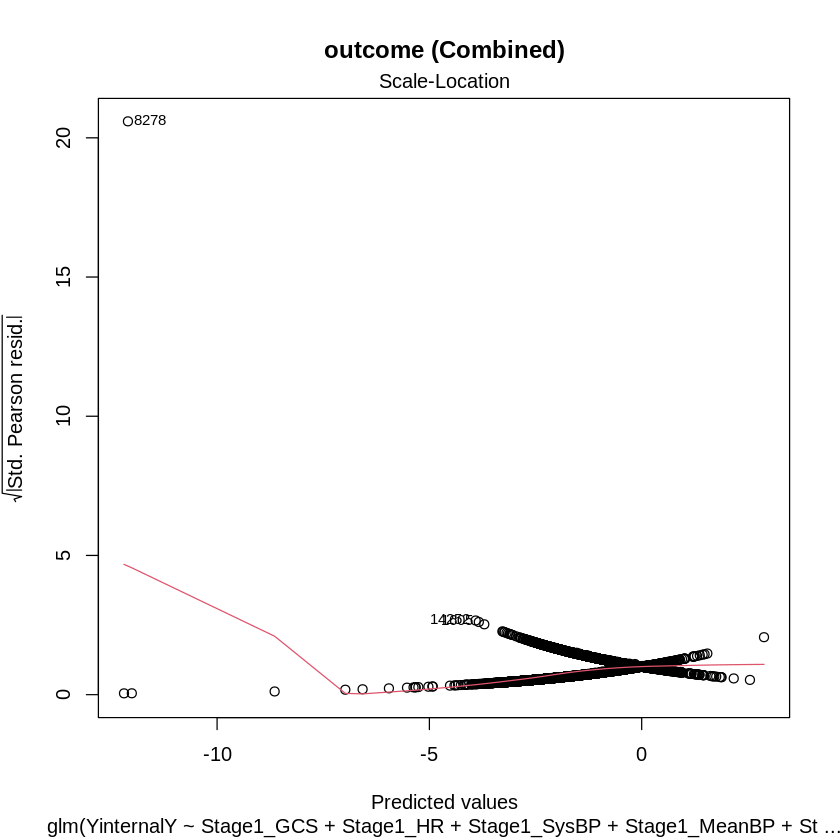

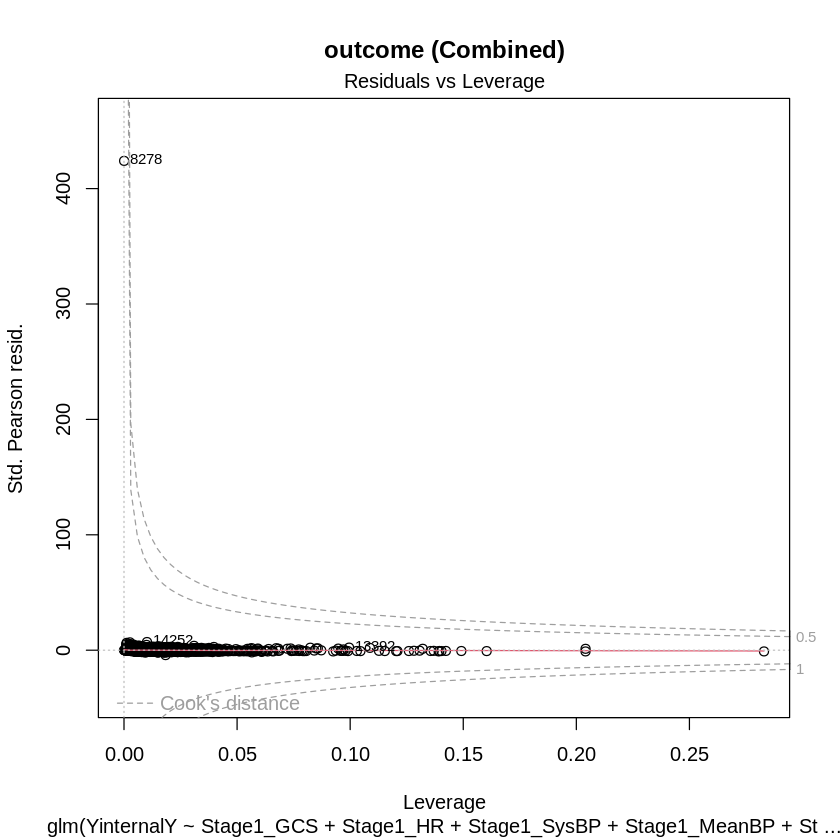

In [19]:
# Plots if defined by outcome regression method
plot(fitSS)

In [20]:
# Show main results of method
show(fitSS)

Q-Learning: step 1 
Outcome Regression Analysis
Combined 

Call:  glm(formula = YinternalY ~ Stage1_GCS + Stage1_HR + Stage1_SysBP + 
    Stage1_MeanBP + Stage1_DiaBP + Stage1_RR + Stage1_SpO2 + 
    Stage1_Temp_C + Stage1_FiO2 + Stage1_Potassium + Stage1_Sodium + 
    Stage1_Chloride + Stage1_Glucose + Stage1_BUN + Stage1_Creatinine + 
    Stage1_Magnesium + Stage1_Calcium + Stage1_Ionised_Ca + Stage1_CO2_mEqL + 
    Stage1_SGOT + Stage1_SGPT + Stage1_Total_bili + Stage1_Albumin + 
    Stage1_Hb + Stage1_WBC_count + Stage1_Platelets_count + Stage1_PTT + 
    Stage1_PT + Stage1_INR + Stage1_Arterial_pH + Stage1_paO2 + 
    Stage1_paCO2 + Stage1_Arterial_BE + Stage1_HCO3 + Stage1_Arterial_lactate + 
    Stage1_mechvent + Stage1_Shock_Index + Stage1_PaO2_FiO2 + 
    Stage2_GCS + Stage2_HR + Stage2_SysBP + Stage2_MeanBP + Stage2_DiaBP + 
    Stage2_RR + Stage2_SpO2 + Stage2_Temp_C + Stage2_FiO2 + Stage2_Potassium + 
    Stage2_Sodium + Stage2_Chloride + Stage2_Glucose + Stage2_BUN + 
    

In [21]:
# Show summary results of method
summary(fitSS)

$outcome
$outcome$Combined

Call:
glm(formula = YinternalY ~ Stage1_GCS + Stage1_HR + Stage1_SysBP + 
    Stage1_MeanBP + Stage1_DiaBP + Stage1_RR + Stage1_SpO2 + 
    Stage1_Temp_C + Stage1_FiO2 + Stage1_Potassium + Stage1_Sodium + 
    Stage1_Chloride + Stage1_Glucose + Stage1_BUN + Stage1_Creatinine + 
    Stage1_Magnesium + Stage1_Calcium + Stage1_Ionised_Ca + Stage1_CO2_mEqL + 
    Stage1_SGOT + Stage1_SGPT + Stage1_Total_bili + Stage1_Albumin + 
    Stage1_Hb + Stage1_WBC_count + Stage1_Platelets_count + Stage1_PTT + 
    Stage1_PT + Stage1_INR + Stage1_Arterial_pH + Stage1_paO2 + 
    Stage1_paCO2 + Stage1_Arterial_BE + Stage1_HCO3 + Stage1_Arterial_lactate + 
    Stage1_mechvent + Stage1_Shock_Index + Stage1_PaO2_FiO2 + 
    Stage2_GCS + Stage2_HR + Stage2_SysBP + Stage2_MeanBP + Stage2_DiaBP + 
    Stage2_RR + Stage2_SpO2 + Stage2_Temp_C + Stage2_FiO2 + Stage2_Potassium + 
    Stage2_Sodium + Stage2_Chloride + Stage2_Glucose + Stage2_BUN + 
    Stage2_Creatinine + Stage2_Magne

In [22]:
moPropen <- buildModelObj(model = ~ Stage2_GCS+
                      Stage2_HR+
                      Stage2_SysBP+
                      Stage2_MeanBP+
                      Stage2_DiaBP+
                      Stage2_RR+
                      Stage2_SpO2+
                      Stage2_Temp_C+
                      Stage2_FiO2+
                      Stage2_Potassium+
                      Stage2_Sodium+
                      Stage2_Chloride+
                      Stage2_Glucose+
                      Stage2_BUN+
                      Stage2_Creatinine+
                      Stage2_Magnesium+
                      Stage2_Calcium+
                      Stage2_Ionised_Ca+
                      Stage2_CO2_mEqL+
                      Stage2_SGOT+
                      Stage2_SGPT+
                      Stage2_Total_bili+
                      Stage2_Albumin+
                      Stage2_Hb+
                      Stage2_WBC_count+
                      Stage2_Platelets_count+
                      Stage2_PTT+
                      Stage2_PT+
                      Stage2_INR+
                      Stage2_Arterial_pH+
                      Stage2_paO2+
                      Stage2_paCO2+
                      Stage2_Arterial_BE+
                      Stage2_HCO3+
                      Stage2_Arterial_lactate+
                      Stage2_mechvent+
                      Stage2_Shock_Index+
                      Stage2_PaO2_FiO2,
                      solver.method = 'glm',
                      solver.args = list('family'='binomial'),
                      predict.method = 'predict.glm',
                      predict.args = list(type='response'))

In [23]:
library(rpart)

In [24]:
moClass <- buildModelObj(model = ~ Stage2_GCS+
                      Stage2_HR+
                      Stage2_SysBP+
                      Stage2_MeanBP+
                      Stage2_DiaBP+
                      Stage2_RR+
                      Stage2_SpO2+
                      Stage2_Temp_C+
                      Stage2_FiO2+
                      Stage2_Potassium+
                      Stage2_Sodium+
                      Stage2_Chloride+
                      Stage2_Glucose+
                      Stage2_BUN+
                      Stage2_Creatinine+
                      Stage2_Magnesium+
                      Stage2_Calcium+
                      Stage2_Ionised_Ca+
                      Stage2_CO2_mEqL+
                      Stage2_SGOT+
                      Stage2_SGPT+
                      Stage2_Total_bili+
                      Stage2_Albumin+
                      Stage2_Hb+
                      Stage2_WBC_count+
                      Stage2_Platelets_count+
                      Stage2_PTT+
                      Stage2_PT+
                      Stage2_INR+
                      Stage2_Arterial_pH+
                      Stage2_paO2+
                      Stage2_paCO2+
                      Stage2_Arterial_BE+
                      Stage2_HCO3+
                      Stage2_Arterial_lactate+
                      Stage2_mechvent+
                      Stage2_Shock_Index+
                      Stage2_PaO2_FiO2,
                         solver.method = 'rpart',
                         solver.args = list(method="class"),
                         predict.args = list(type='class'))

In [25]:
fitSS_IPW <- optimalClass(moPropen = moPropen,
                          moClass = moClass,
                          data = mydata_RL,
                          response = y,
                          txName = 'A2')

IPW value estimator


First step of the Classification Algorithm.

Classification Perspective.




Propensity for treatment regression.
Regression analysis for moPropen:

Call:  glm(formula = YinternalY ~ Stage2_GCS + Stage2_HR + Stage2_SysBP + 
    Stage2_MeanBP + Stage2_DiaBP + Stage2_RR + Stage2_SpO2 + 
    Stage2_Temp_C + Stage2_FiO2 + Stage2_Potassium + Stage2_Sodium + 
    Stage2_Chloride + Stage2_Glucose + Stage2_BUN + Stage2_Creatinine + 
    Stage2_Magnesium + Stage2_Calcium + Stage2_Ionised_Ca + Stage2_CO2_mEqL + 
    Stage2_SGOT + Stage2_SGPT + Stage2_Total_bili + Stage2_Albumin + 
    Stage2_Hb + Stage2_WBC_count + Stage2_Platelets_count + Stage2_PTT + 
    Stage2_PT + Stage2_INR + Stage2_Arterial_pH + Stage2_paO2 + 
    Stage2_paCO2 + Stage2_Arterial_BE + Stage2_HCO3 + Stage2_Arterial_lactate + 
    Stage2_mechvent + Stage2_Shock_Index + Stage2_PaO2_FiO2, 
    family = "binomial", data = data)

Coefficients:
            (Intercept)               Stage2_GCS                Stage2_HR  
              7.170e+00                1.185e-02                3.689e-04  
           

In [26]:
install.packages('rpart.plot')
library(rpart.plot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Warning message:
“Cannot retrieve the data used to build the model (so cannot determine roundint and is.binary for the variables).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE.”


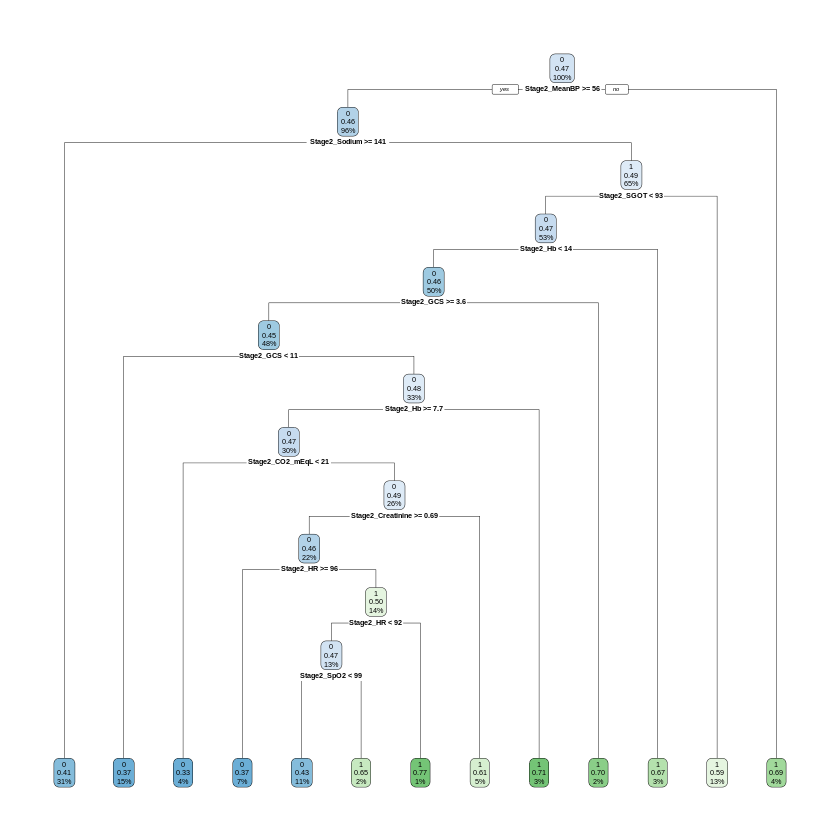

In [27]:
rpart.plot(classif(object = fitSS_IPW))

In [28]:
A2IPW <- optTx(fitSS_IPW)$optimalTx

In [29]:
moMain <- buildModelObj(model = ~ Stage1_GCS+
                      Stage1_HR+
                      Stage1_SysBP+
                      Stage1_MeanBP+
                      Stage1_DiaBP+
                      Stage1_RR+
                      Stage1_SpO2+
                      Stage1_Temp_C+
                      Stage1_FiO2+
                      Stage1_Potassium+
                      Stage1_Sodium+
                      Stage1_Chloride+
                      Stage1_Glucose+
                      Stage1_BUN+
                      Stage1_Creatinine+
                      Stage1_Magnesium+
                      Stage1_Calcium+
                      Stage1_Ionised_Ca+
                      Stage1_CO2_mEqL+
                      Stage1_SGOT+
                      Stage1_SGPT+
                      Stage1_Total_bili+
                      Stage1_Albumin+
                      Stage1_Hb+
                      Stage1_WBC_count+
                      Stage1_Platelets_count+
                      Stage1_PTT+
                      Stage1_PT+
                      Stage1_INR+
                      Stage1_Arterial_pH+
                      Stage1_paO2+
                      Stage1_paCO2+
                      Stage1_Arterial_BE+
                      Stage1_HCO3+
                      Stage1_Arterial_lactate+
                      Stage1_mechvent+
                      Stage1_Shock_Index+
                      Stage1_PaO2_FiO2+
                      Stage2_GCS+
                      Stage2_HR+
                      Stage2_SysBP+
                      Stage2_MeanBP+
                      Stage2_DiaBP+
                      Stage2_RR+
                      Stage2_SpO2+
                      Stage2_Temp_C+
                      Stage2_FiO2+
                      Stage2_Potassium+
                      Stage2_Sodium+
                      Stage2_Chloride+
                      Stage2_Glucose+
                      Stage2_BUN+
                      Stage2_Creatinine+
                      Stage2_Magnesium+
                      Stage2_Calcium+
                      Stage2_Ionised_Ca+
                      Stage2_CO2_mEqL+
                      Stage2_SGOT+
                      Stage2_SGPT+
                      Stage2_Total_bili+
                      Stage2_Albumin+
                      Stage2_Hb+
                      Stage2_WBC_count+
                      Stage2_Platelets_count+
                      Stage2_PTT+
                      Stage2_PT+
                      Stage2_INR+
                      Stage2_Arterial_pH+
                      Stage2_paO2+
                      Stage2_paCO2+
                      Stage2_Arterial_BE+
                      Stage2_HCO3+
                      Stage2_Arterial_lactate+
                      Stage2_mechvent+
                      Stage2_Shock_Index+
                      Stage2_PaO2_FiO2,
                      solver.method = 'glm',
                      solver.args = list('family'='binomial'),
                      predict.method = 'predict.glm',
                      predict.args = list(type='response'))

In [30]:
moCont <- buildModelObj(model = ~ Stage2_GCS+
                      Stage2_HR+
                      Stage2_SysBP+
                      Stage2_MeanBP+
                      Stage2_DiaBP+
                      Stage2_RR+
                      Stage2_SpO2+
                      Stage2_Temp_C+
                      Stage2_FiO2+
                      Stage2_Potassium+
                      Stage2_Sodium+
                      Stage2_Chloride+
                      Stage2_Glucose+
                      Stage2_BUN+
                      Stage2_Creatinine+
                      Stage2_Magnesium+
                      Stage2_Calcium+
                      Stage2_Ionised_Ca+
                      Stage2_CO2_mEqL+
                      Stage2_SGOT+
                      Stage2_SGPT+
                      Stage2_Total_bili+
                      Stage2_Albumin+
                      Stage2_Hb+
                      Stage2_WBC_count+
                      Stage2_Platelets_count+
                      Stage2_PTT+
                      Stage2_PT+
                      Stage2_INR+
                      Stage2_Arterial_pH+
                      Stage2_paO2+
                      Stage2_paCO2+
                      Stage2_Arterial_BE+
                      Stage2_HCO3+
                      Stage2_Arterial_lactate+
                      Stage2_mechvent+
                      Stage2_Shock_Index+
                      Stage2_PaO2_FiO2,
                      solver.method = 'glm',
                      solver.args = list('family'='binomial'),
                      predict.method = 'predict.glm',
                      predict.args = list(type='response'))

In [31]:
fitSS_AIPW <- optimalClass(moPropen = moPropen,
                           moMain = moMain,
                           moCont = moCont,
                           moClass = moClass,
                           data = mydata_RL,
                           response = y,
                           txName = 'A2')

AIPW value estimator


First step of the Classification Algorithm.

Classification Perspective.




Propensity for treatment regression.
Regression analysis for moPropen:

Call:  glm(formula = YinternalY ~ Stage2_GCS + Stage2_HR + Stage2_SysBP + 
    Stage2_MeanBP + Stage2_DiaBP + Stage2_RR + Stage2_SpO2 + 
    Stage2_Temp_C + Stage2_FiO2 + Stage2_Potassium + Stage2_Sodium + 
    Stage2_Chloride + Stage2_Glucose + Stage2_BUN + Stage2_Creatinine + 
    Stage2_Magnesium + Stage2_Calcium + Stage2_Ionised_Ca + Stage2_CO2_mEqL + 
    Stage2_SGOT + Stage2_SGPT + Stage2_Total_bili + Stage2_Albumin + 
    Stage2_Hb + Stage2_WBC_count + Stage2_Platelets_count + Stage2_PTT + 
    Stage2_PT + Stage2_INR + Stage2_Arterial_pH + Stage2_paO2 + 
    Stage2_paCO2 + Stage2_Arterial_BE + Stage2_HCO3 + Stage2_Arterial_lactate + 
    Stage2_mechvent + Stage2_Shock_Index + Stage2_PaO2_FiO2, 
    family = "binomial", data = data)

Coefficients:
            (Intercept)               Stage2_GCS                Stage2_HR  
              7.170e+00                1.185e-02                3.689e-04  
           

Warning message:
“Cannot retrieve the data used to build the model (so cannot determine roundint and is.binary for the variables).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE.”


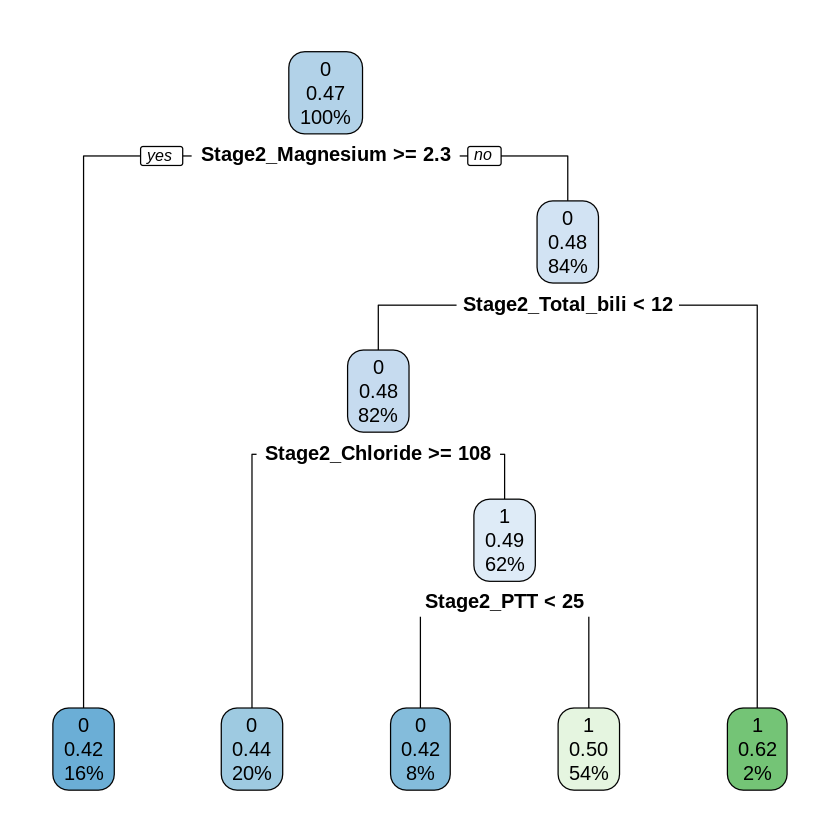

In [32]:
rpart.plot(classif(object = fitSS_AIPW))